In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download NLTK stopwords (run once)
#import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
# Load the dataset (replace with your path if needed)
try:
    # Try loading from local file first
    df = pd.read_csv('spam.csv', encoding='latin-1')
except FileNotFoundError:
    # If file not found, download from URL
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
    df = pd.read_csv(url, compression='zip', encoding='latin-1', header=None, skiprows=1, names=['label', 'message'])
else:
    # If local file exists but has different format
    df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})

# Clean the data
df = df[['label', 'message']].dropna()
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [6]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

Accuracy: 96.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



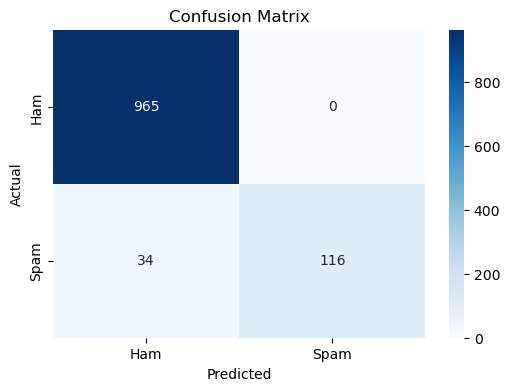


Message: 'Congratulations! You've won a $1000 prize! Click here to claim'
Prediction: Spam

Message: 'Hey, can we meet tomorrow to discuss the project?'
Prediction: Not Spam

Message: 'URGENT: Your account has been compromised. Verify now!'
Prediction: Spam


In [7]:
# Apply preprocessing
df['processed_text'] = df['message'].apply(preprocess_text)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['label'], test_size=0.2, random_state=42
)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Example prediction
test_messages = [
    "Congratulations! You've won a $1000 prize! Click here to claim",
    "Hey, can we meet tomorrow to discuss the project?",
    "URGENT: Your account has been compromised. Verify now!"
]

for msg in test_messages:
    processed = preprocess_text(msg)
    vectorized = tfidf.transform([processed])
    prediction = nb_classifier.predict(vectorized)
    print(f"\nMessage: '{msg}'")
    print("Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")